## 로지스틱 회귀 구현

X:  [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.9008264

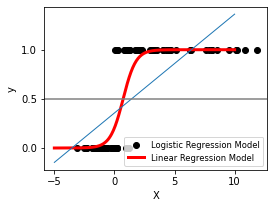

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

# 데이터를 생성하고 반환하는 함수입니다.
def load_data():
    
    np.random.seed(0)
    
    X = np.random.normal(size = 100)
    print("X: ",X)
    y = (X > 0).astype(np.float)
    print("y: ", y)
    X[X > 0] *= 5
    X += .7 * np.random.normal(size = 100)
    X = X[:, np.newaxis]
    print("X: ",X)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 100)
    
    return train_X, test_X, train_y, test_y

"""
1. 로지스틱 회귀 모델을 구현하고, 
   학습 결과를 확인할 수 있는 main() 함수를 완성합니다. 
   
   Step01. 데이터를 불러옵니다.
   
   Step02. 로지스틱 회귀 모델을 정의합니다.
   
   Step03. 학습용 데이터로 로지스틱 회귀 모델을
           학습시킵니다.
   
   Step04. 테스트용 데이터로 예측한 분류 결과를
           확인합니다.
"""

from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.special import expit

#plot을 그려주는 함수
def plot_logistic_regression(model, X_data, y_data):
   plt.figure(1, figsize=(4,3))
   plt.clf()
   plt.scatter(X_data.ravel(), y_data, color='black')#, zorder=20)
   X_test = np.linspace(-5, 10, 300)
   loss = expit(X_test * model.coef_ + model.intercept_).ravel()
   plt.plot(X_test, loss, color='red', linewidth=3)
  
   ols = linear_model.LinearRegression()
   ols.fit(X_data, y_data)
   plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
   plt.axhline(.5, color='.5')

   plt.ylabel('y')
   plt.xlabel('X')
   #plt.xticks( range(-5,10))
   plt.yticks([0,0.5, 1])
   #plt.ylim(-.25,1.25)
   #plt.xlim(-4,10)
   plt.legend(('Logistic Regression Model', 'Linear Regression Model'), loc="lower right",fontsize='small')
   plt.show()


def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    logistic_model = LogisticRegression()
    
    logistic_model.fit(train_X,train_y)
    
    predicted = logistic_model.predict(test_X)
    
    # 예측 결과 확인하기 
    print("예측 결과 :", predicted) 
    plot_logistic_regression(logistic_model, train_X, train_y)
    
    
main()

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

def load_data():

def SVM(train_X, test_X, train_y, test_y):
    svm = SVC()
    svm.fit(train_X, train_y)
    pred_y = sv
    
def main():
    

### 나이브베이즈 분류

In [5]:
#           스팸 메일       정상 메일       개수   
#    
#  '확인'    5                 2             7
#
#   나머지   3                10            13
#
#   개수     8                12            20

import numpy as np

"""
1. "확인" 이라는 키워드가 등장했을 때 
    해당 메일이 스팸 메일인지 정상 메일인지
    판별하기 위한 함수를 구현합니다.
"""
def bayes_theorem():
    # 1. P('스팸 메일')의 확률을 구하세요
    p_spam = 8 / 20
    
    # 2. P("확인" | "스팸 메일")의 확률을 구하세요.
    p_confirm_spam =  5/8

    # 3. P("정상 메일")의 확률을 구하세요
    p_ham = 12/ 20
    
    # 4. P('확인' | '정상메일')의 확률을 구하세요
    p_confirm_ham = 2/12
    
    # 5. P("스팸 메일" | "확인")
    # P("스팸 메일" | "확인") = P("확인"|"스팸메일") * P("스팸메일") / P("확인")
    p_spam_confirm = p_confirm_spam * p_spam / (7/20)
    
    # 6. P("정상메일" | "확인")의 확률을 구하세요
    # P("정상메일"|"확인") = P("확인"|"정상 메일") * P("정상 메일")/P("확인")
    p_ham_confirm = p_confirm_ham * p_ham / (7/20)
    
    return p_spam_confirm, p_ham_confirm

def main():
    
    p_spam_confirm, p_ham_confirm = bayes_theorem()
    
    print("P(spam|confirm) = ",p_spam_confirm, "\nP(ham|confirm) = ",p_ham_confirm, "\n")
        
    # 두 값을 비교하여 확인 키워드가 스팸에 가까운지 정상 메일에 가까운지 확인합니다.
    value = [p_spam_confirm, p_ham_confirm]
    
    if p_spam_confirm > p_ham_confirm:
        print( round(value[0] * 100, 2), "% 의 확률로 스팸 메일에 가깝습니다.")
    else :
        print( round(value[1] * 100, 2), "% 의 확률로 일반 메일에 가깝습니다.")
        
main()

P(spam|confirm) =  0.7142857142857143 
P(ham|confirm) =  0.2857142857142857 

71.43 % 의 확률로 스팸 메일에 가깝습니다.


### 가우스나이브베이즈

In [6]:
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

"""
1. 데이터를 불러오고, 
   불러온 데이터를 학습용, 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 저장되어 있는 데이터를 
           (X, y) 형태로 불러옵니다.
   
   Step02. 불러온 데이터를 
           학습용 데이터와 테스트용 데이터로 분리합니다.
           
           학습용 데이터 : 80%, 테스트용 데이터 : 20%, 
           
           일관된 결과 확인을 위해 random_state를 
           0 으로 설정합니다.
"""
def load_data():
    
    X, y = load_wine(return_X_y = True)
    
    print("데이터 확인해보기 :\n", X[:1])
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,
        test_size = 0.2, random_state = 0)
    
    return train_X, test_X, train_y, test_y
    
"""
2. 가우시안 나이브 베이즈 모델을 불러오고,
   학습을 진행한 후 테스트 데이터에 대한 
   예측값을 반환하는 함수를 구현합니다.
   
   Step01. 가우시안 나이브 베이즈 모델을 정의합니다.
   
   Step02. 학습용 데이터에 대해 모델을 학습시킵니다.
   
   Step03. 테스트 데이터에 대한 모델 예측을 수행합니다.
"""
def Gaussian_NB(train_X, test_X, train_y, test_y):
    
    model = GaussianNB()
    
    model.fit(train_X, train_y)
    
    predicted = model.predict(test_X)
    
    return predicted

# 데이터 불러오기, 모델 예측 결과를 확인할 수 있는 함수입니다.
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    predicted = Gaussian_NB(train_X, test_X, train_y, test_y)
    
    ## 모델 정확도를 통해 분류 성능을 확인해봅니다.
    print("\nModel Accuracy : ")
    print(accuracy_score(test_y, predicted))
    
    
main()

데이터 확인해보기 :
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]

Model Accuracy : 
0.9166666666666666


### KNN

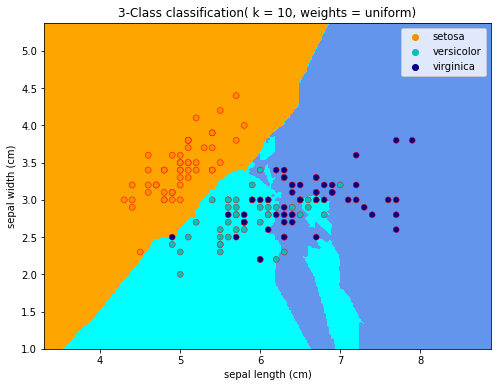

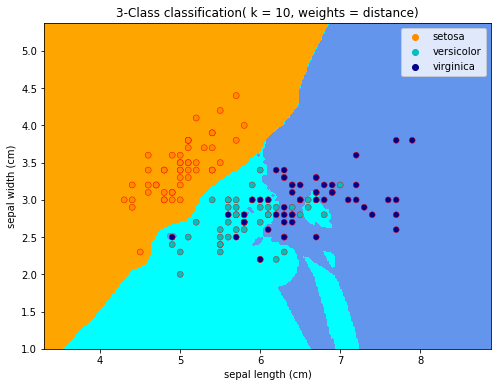

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighors = 10

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

#print(X.shape, y.shape)

h =  0.02 # step size in the mesh

cmap_light = ListedColormap(["orange","cyan","cornflowerblue"])
cmap_bold = ['darkorange','c','darkblue']

for weights in ['uniform','distance']:
    clf = neighbors.KNeighborsClassifier(n_neighors,weights=weights)
    clf.fit(X,y)
    x_min, x_max = X[:, 0].min() -1, X[:,0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max, h))
    #print(xx.shape)
    #print(yy.shape)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #print(Z.shape)
    Z = Z.reshape(xx.shape)
    #print(Z.shape)
    plt.figure(figsize= (8,6))
    plt.contourf(xx,yy,Z,cmap=cmap_light)
    sns.scatterplot(x = X[:,0],
                    y = X[:,1],
                   hue = iris.target_names[y],
                   palette = cmap_bold,
                   alpha= 1.0,
                   edgecolor = 'red')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification( k = %i, weights = %s)" % (n_neighors , weights)
    )
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    
plt.show()

### 혼동행렬

[[17  0  2]
 [ 1 20  1]
 [ 1  7  5]]
cm: 
 [[17  0  2]
 [ 1 20  1]
 [ 1  7  5]]


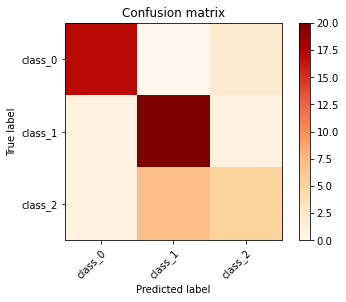

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def load_data():
    X,y = load_wine(return_X_y= True)
    class_names = load_wine().target_names
    #print(class_names)
    train_X,test_X,train_y, test_y = train_test_split(X,y,test_size=0.3,
                                                     random_state=0)
    return train_X, test_X, train_y, test_y, class_names

def plot_confusion_matrix(cm, y_true, y_pred, classes, normalize=False, cmap = plt.cm.OrRd):
    title= ""
    if normalize:
        title = "Normalized confusion matrix"
    else:
        title = "Confusion matrix"
    classes = classes[unique_labels(y_true, y_pred)]
    print("cm: \n",cm)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm,cmap=cmap)
    ax.figure.colorbar(im,ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes, yticklabels=classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label'
          )
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

def main():
    train_X, test_X, train_y, test_y , class_names = load_data()
    classifier = SVC()
    y_pred = classifier.fit(train_X,train_y).predict(test_X)
    cm = confusion_matrix(test_y, y_pred)
    print(cm)
    plot_confusion_matrix(cm,test_y, y_pred, classes=class_names)
    
    
main()

[[17  0  2]
 [ 1 20  1]
 [ 1  7  5]]
cm: 
 [[17  0  2]
 [ 1 20  1]
 [ 1  7  5]]


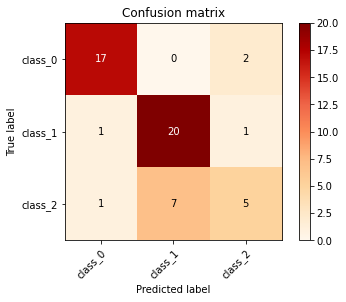

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def load_data():
    X,y = load_wine(return_X_y= True)
    class_names = load_wine().target_names
    #print(class_names)
    train_X,test_X,train_y, test_y = train_test_split(X,y,test_size=0.3,
                                                     random_state=0)
    return train_X, test_X, train_y, test_y, class_names

def plot_confusion_matrix(cm, y_true, y_pred, classes, normalize=False, cmap = plt.cm.OrRd):
    title= ""
    if normalize:
        title = "Normalized confusion matrix"
    else:
        title = "Confusion matrix"
    classes = classes[unique_labels(y_true, y_pred)]
    print("cm: \n",cm)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm,cmap=cmap)
    ax.figure.colorbar(im,ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes, yticklabels=classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label'
          )
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')  
    fmt = '.2f' if normalize else 'd'
#     if normalize:
#         fmt = '.2f'
#     else:
#         fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i, format(cm[i,j], fmt),
                    ha='center', va='center',
                color='white' if cm[i,j] > thresh else 'black')
    
            

def main():
    train_X, test_X, train_y, test_y , class_names = load_data()
    classifier = SVC()
    y_pred = classifier.fit(train_X,train_y).predict(test_X)
    cm = confusion_matrix(test_y, y_pred)
    print(cm)
    plot_confusion_matrix(cm,test_y, y_pred, classes=class_names)
    
    
main()

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def load_data():
    iris = load_iris()
    irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    irisDF['target'] = iris.target
    return irisDF
def k_means_clus(irisDF):
    kmeans = KMeans(init='random', n_clusters = 3, random_state = 100)
    kmeans.fit(irisDF.drop('target',axis=1))
    print(kmeans.labels_)

def main():
    irisDF = load_data()
    iris_result,irisDF = k_means_clus(irisDF)
main()

ModuleNotFoundError: No module named 'sklearn'